# 1. Метод k ближайших соседей

Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких
классов и визуализируйте разделяющие поверхности, получаемые при решении задачи классифкации методом k ближайших соседей для разных k. Попробуйте подобрать оптимальное
значение количества соседей k с помощью 5-fold cross-validation, построив график зависимо-
сти accuracy в кросс-валидации от k.

In [1]:
from matplotlib.colors import ListedColormap 
from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score 
import numpy as np 
%pylab inline 

/home/alexandra/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


Генерация обучающей выборки из описанных двумя признаками объектов четырех классов.

In [2]:
classification_problem = datasets.make_classification(n_samples=200, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

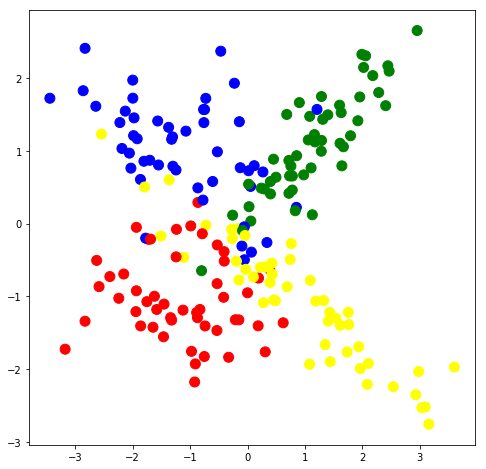

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

pylab.figure(figsize=(8,8))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [4]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [5]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [6]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [7]:
def show_decision(num):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=num)

    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
    
    accuracy = metrics.accuracy_score(test_labels, estimator.predict(test_data))
    
    return accuracy

Построение разделяющих поверхностей,получаемых при решении задачи классифкации методом k ближайших соседей для разных k.

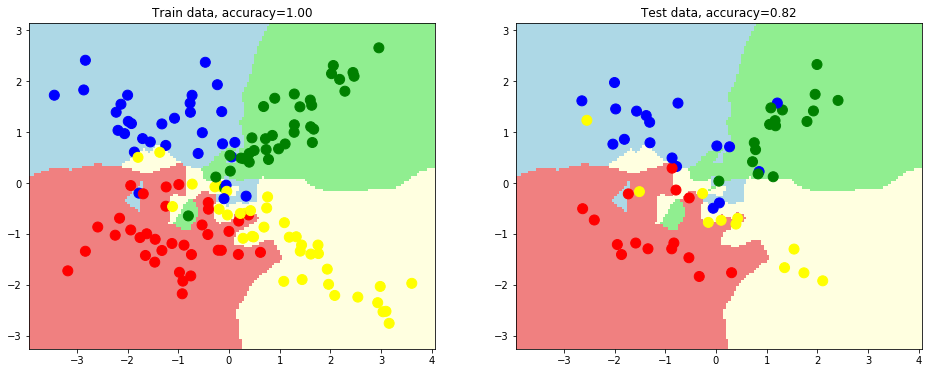

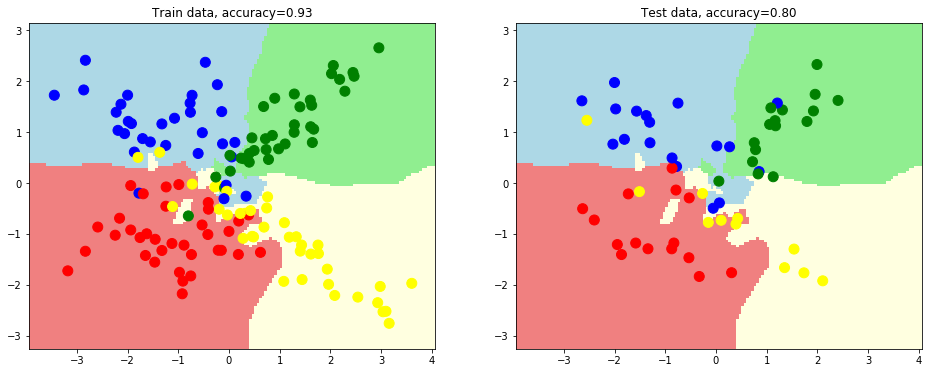

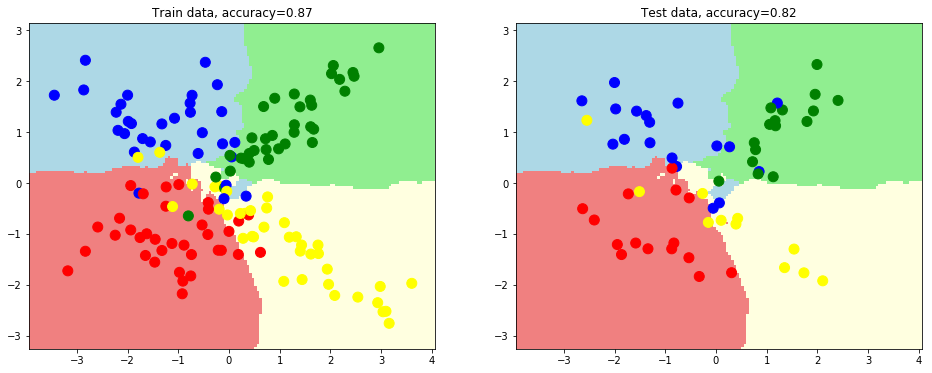

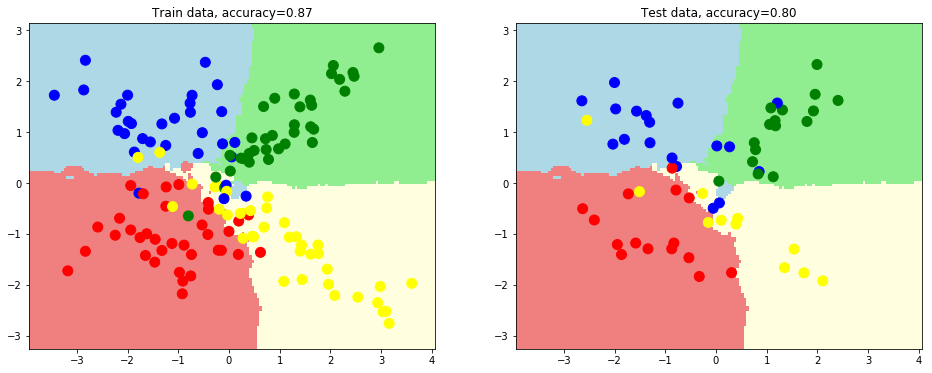

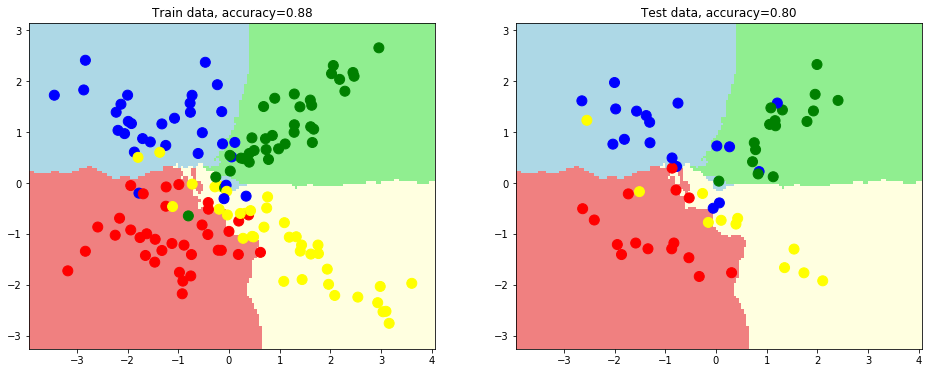

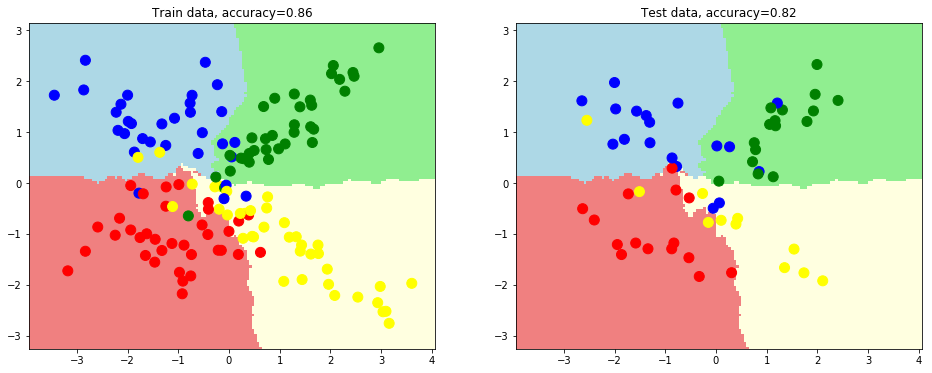

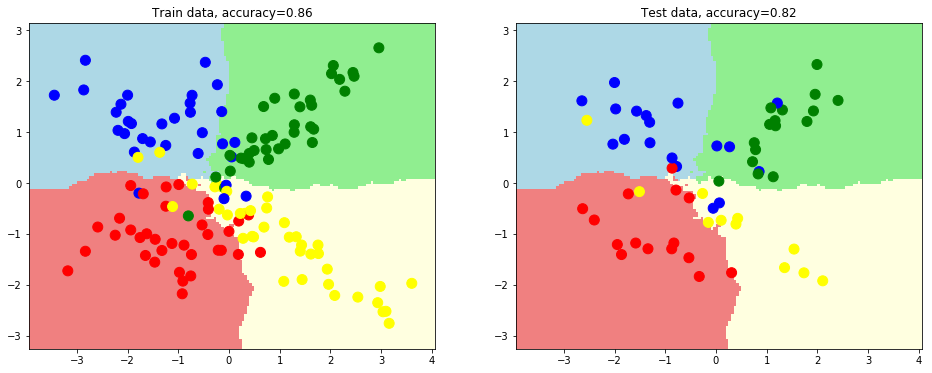

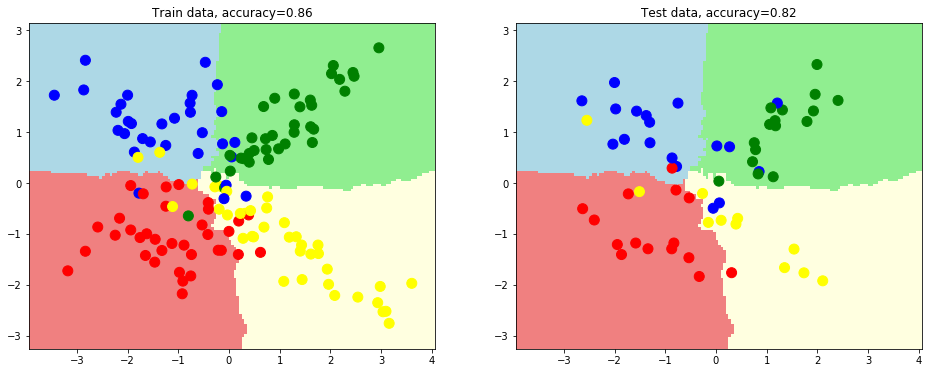

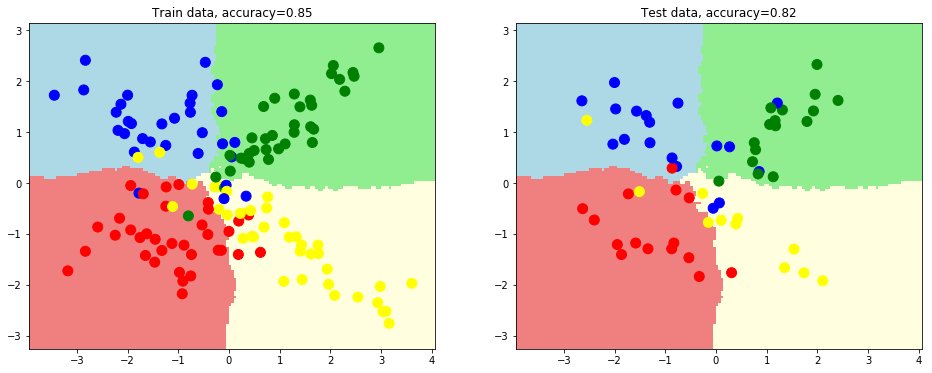

In [9]:
X = np.array([1, 2, 5, 7, 9, 15, 25, 35, 45])
Y = np.zeros(X.size)

for i in range (X.size):
    Y[i] = show_decision(X[i])

Подобор оптимального значения количества соседей k с помощью 5-fold cross-validation.

In [11]:
def cv_nn(n_neighbors, X, y):
    average_scores = []
    cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42)
    for k in n_neighbors:
        estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(estimator, X, y, cv=cv)
        average_scores.append(scores.mean())
    return average_scores

In [12]:
n_neighbors = range(1, 45)
average_scores = cv_nn(n_neighbors, classification_problem[0], classification_problem[1])

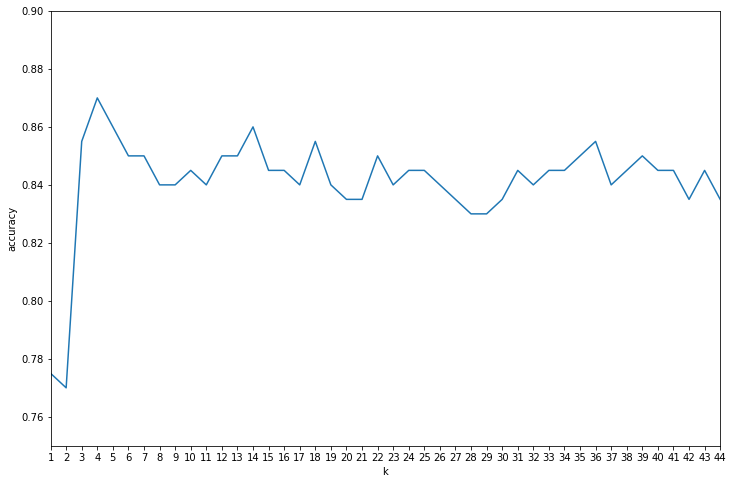

In [16]:
plt.figure(figsize=(12, 8))
l1 = plt.plot(n_neighbors, average_scores)

plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0.75, 0.9)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(n_neighbors)

plt.show()

 Из графика получаем,что оптимальное значение количества соседей в методе kNN равно 5.

# 2. Наивный байесовский классификатор

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек
из обучающих выборок и посмотрите на признаки. С помощью sklearn.model_selection.cross_val_score
c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray,
сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для
сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько
полученные результаты согласуются с вашими ожиданиями?

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from pandas import DataFrame

In [24]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

Несколько строчек из обучающей выборки:

In [26]:
digits_frame = DataFrame(digits.data)

digits_frame.head(6)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0


Несколько строчек из второй обучающей выборки:

In [27]:
breast_cancer_frame = DataFrame(breast_cancer.data)
breast_cancer_frame.columns = breast_cancer.feature_names
breast_cancer_frame.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [28]:
def bayes_train(data, target):
    average_scores = []
    
    model = BernoulliNB()
    scores = cross_val_score(model, data, target)
    average_scores.append([scores.mean(), 'Bernoulli'])
    
    model = MultinomialNB()
    scores = cross_val_score(model, data, target)
    average_scores.append([scores.mean(), 'Multinomial'])
    
    model = GaussianNB()
    scores = cross_val_score(model, data, target)
    average_scores.append([scores.mean(), 'Gaussian'])
    
    return average_scores

Модель GaussianNB - признаки с нормальным распределением, MultinomialNB - для целочисленных признаков,BernoulliNB - для двоичных признаков -> для выборки 'digits' ожидается лучшее качество модели MultinomialNB, для 'breast_cancer' -  модели GaussianNB. 

In [30]:
average_scores = bayes_train(digits.data, digits.target)
print 'Mean accuracy for  \'digits\': \n', average_scores

average_scores = bayes_train(breast_cancer.data, breast_cancer.target)
print 'Mean accuracy for \'breast_cancer\': \n', average_scores

Mean accuracy for  'digits': 
[[0.82582365077805819, 'Bernoulli'], [0.87087714897350532, 'Multinomial'], [0.81860038035501381, 'Gaussian']]
Mean accuracy for 'breast_cancer': 
[[0.62742040285899936, 'Bernoulli'], [0.89457904019307521, 'Multinomial'], [0.9367492806089297, 'Gaussian']]


1) Каким получилось максимальное качество классификации на датасете breast_cancer?

Accuracy = 0.9367492806089297 (классификатор GaussianNB)

2) Каким получилось максимальное качество классификации на датасете digits?

Accuracy = 0.87087714897350532 (классификатор MultinomialNB)

3) Какие утверждения из приведенных ниже верны?
(a) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с распределением Бернулли
(b) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с мультиномиальным распределением
(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неот-
рицательными значениями признаков
(d) На вещественных признаках лучше всего сработало нормальное распределение.

Ответ: d

# 3. Метрики в задаче регрессии

Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + ", где "
распределено нормально с матожиданием 0 и дисперсией 0.2.
1. Визуализируйте выборку.
2. Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b,
и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.
Визуализируйте восстановленную прямую.
3. Добавьте теперь в выборку 75 точек, для которых y = 1 + ", а x принимает различные
значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По
новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b
двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.
4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизирующих MSE и MAE к выбросам.

In [69]:
import numpy as np
from scipy.stats import norm 
import scipy as sps
import matplotlib.pyplot as plt

In [70]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/alexandra/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Генерация датасета из 500 точек:

In [71]:
mu, sigma = 0, 0.2 
n = 500
x = np.linspace(0,10,n)
def f(x):
    random = np.random.normal(mu, sigma, n)
    return 0.5*x+1+random

1) Визуализация 

/home/alexandra/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


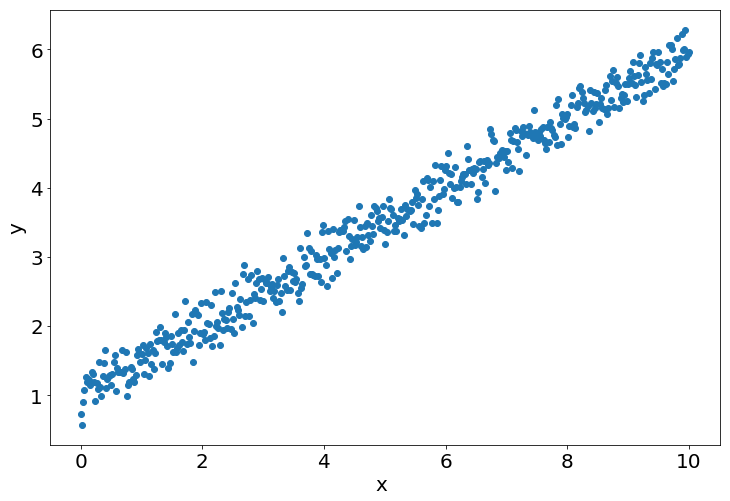

In [77]:
pylab.figure(figsize=(12,8))
pylab.scatter(x, f(x))
plt.xlabel(r"x ", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

2) Восстановление по выборке зависимости y(x), считая, что зависимость имеет вид y = kx+b, и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize. Визуализация восстановленной прямой.


In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
A = np.array(zip(x, np.ones(n)))
y = f(x)

def MSE_of_linear_func(x):
    return mean_squared_error(A.dot(x), y)

In [95]:
from scipy.optimize import minimize
x0 = [0, 0]
res1 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization: k = {}, b = {}".format(res1.x[0], res1.x[1]))

MSE optimization: k = 0.502477508689, b = 0.988632569938


Визуализация восстановленной прямой:

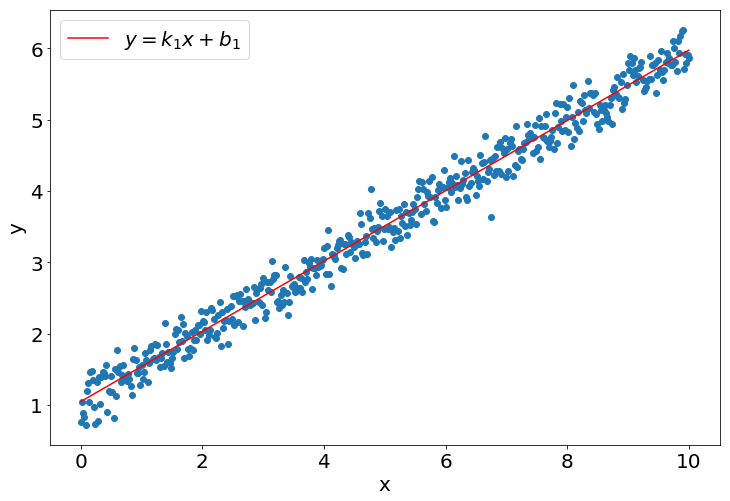

In [83]:
pylab.figure(figsize=(12,8))
pylab.scatter(x, y)
plt.plot(x, res1.x[0]*x+res1.x[1], c = 'r', label=r"$ y = k_{1}x+b_{1}$")

plt.xlabel(r"x", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

3) Добавление в выборку 75 точек, для которых y = 1 + ", а x принимает различные значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По новой расширенной выборке восстановление зависимости y(x) = kx + b двумя способами: минимизируя MSE и минимизируя MAE. Визуализация полученных прямых.

In [98]:
x_app = np.concatenate((x,np.linspace(0,10,75)), axis = 0)

In [99]:
y1 = -1 + np.random.normal(mu, sigma, 75)
y_app = np.concatenate((y,y1), axis = 0)

In [103]:
from sklearn.metrics import mean_absolute_error
A_app = np.array(zip(x_app, np.ones(575)))

def MSE_of_linear_func(x):
    return mean_squared_error(A_app.dot(x), y_app)

def MAE_of_linear_func(x):
    return mean_absolute_error(A_app.dot(x), y_app)

In [105]:
from scipy.optimize import minimize
x0 = [0, 0]
res2 = minimize(MSE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MSE optimization: k = {}, b = {}".format(res2.x[0], res2.x[1]))

MSE optimization: k = 0.433840060288, b = 0.742235409566


In [107]:
from scipy.optimize import minimize
x0 = [0, 0]
res3 = minimize(MAE_of_linear_func, x0, method='Nelder-Mead', tol=1e-6)
print("MAE optimization: k = {}, b = {}".format(res3.x[0], res3.x[1]))

MAE optimization: k = 0.503959155494, b = 0.95400515246


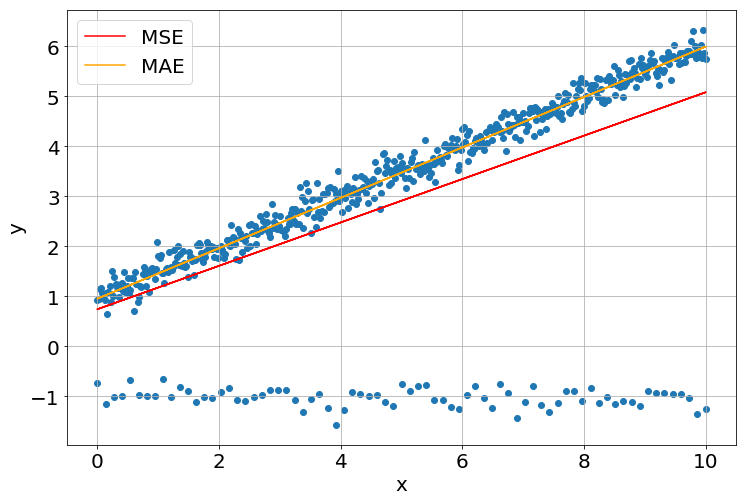

In [109]:
pylab.figure(figsize=(12,8))
pylab.scatter(x_app, y_app)
#plt.semilogy(x_new, res1.x[0]*x_new+res1.x[1], c = 'black', label=r"MSE")
plt.semilogy(x_app, res2.x[0]*x_app+res2.x[1], c = 'r', label=r"MSE")
plt.semilogy(x_app, res3.x[0]*x_app+res3.x[1], c = 'orange', label=r"MAE")
plt.xlabel(r"x", fontsize=20)
plt.ylabel(r"y", fontsize=20)
plt.grid()
plt.yscale('linear')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)

4)На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизирующих MSE и MAE к выбросам.
Вывод: модель, оптимизирующая MAE более устойчива к выбросам, чем модель, оптимизирующая MSE.